# Number of patients

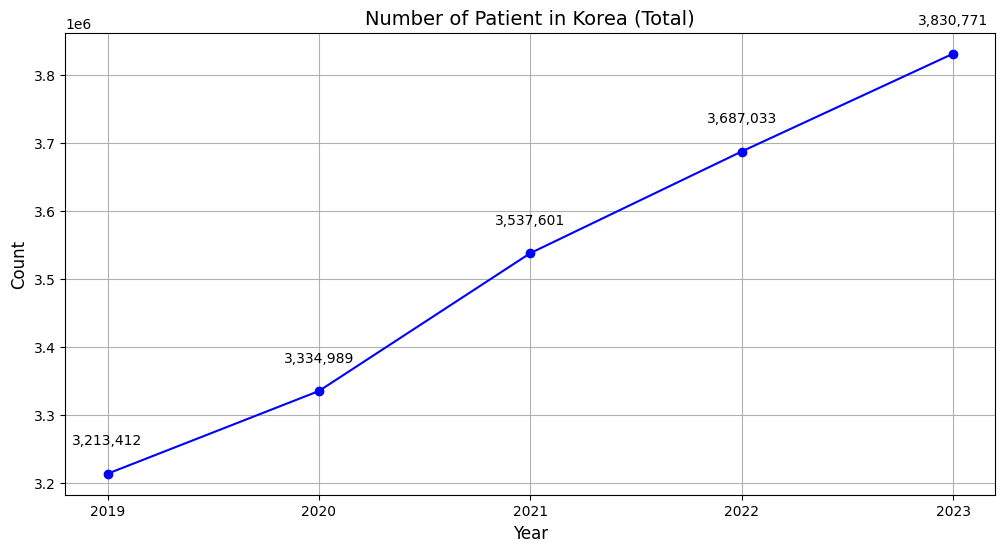

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

diabetes_data = pd.read_csv('diabetes_data.csv')

year = [2019, 2020, 2021, 2022, 2023]

plt.figure(figsize=(12, 6))

nums = diabetes_data[diabetes_data['구분'] == "계"].iloc[0, 1:-1].values

plt.plot(year, nums, color='blue', marker='o')

for y, n in zip(year, nums):
    plt.text(y, n + max(nums) * 0.01, f"{n:,}", fontsize=10, ha='center', va='bottom')

plt.title("Number of Patient in Korea (Total)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(year)
plt.grid(True)

plt.show()

# Survey

# visulization & propotional z-test

In [ ]:
import pandas as pd
df = pd.read_csv("discount_survey.csv")

In [ ]:
df

,id,piknic,milk,coffee,ramen,ice_cream,cereal,mustard,anchovy_noodle,soddeok,choco_cookie
0,1,Discount,Discount,Discount,Discount,Discount,Discount,No Discount,Discount,Discount,No Discount
1,2,No Discount,discount,discount,discount,discount,discount,discount,discount,discount,No Discount
2,3,Discount,Discount,No Discount,Discount,Discount,No Discount,Discount,Discount,Discount,Discount
3,4,discount,discount,discount,discount,discount,discount,discount,discount,discount,discount
4,5,discount,discount,discount,No Discount,discount,No Discount,discount,discount,discount,discount
...,...,...,...,...,...,...,...,...,...,...,...
147,148,No Discount,No Discount,No Discount,No Discount,No Discount,No Discount,No Discount,No Discount,No Discount,No Discount
148,149,No Discount,No Discount,No Discount,No Discount,No Discount,Discount,No Discount,No Discount,Discount,No Discount
149,150,Discount,No Discount,Discount,No Discount,No Discount,Discount,Discount,Discount,Discount,Discount
150,151,Discount,Discount,Discount,Discount,Discount,Discount,No Discount,Discount,Discount,Discount


In [ ]:
df = df.applymap(
    lambda x: str(x).strip().lower().replace("no discount", "No Discount").replace("discount", "Discount") if isinstance(x, str) else x
)

<ipython-input-3-cacaee7a5d44>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(


In [ ]:
no_discount_count = (df == "No Discount").sum().sum()
print("Total 'No Discount':", no_discount_count)

discount_count = (df == "Discount").sum().sum()
print("Total 'Discount':", discount_count)

Total 'No Discount': 397
Total 'Discount': 635


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


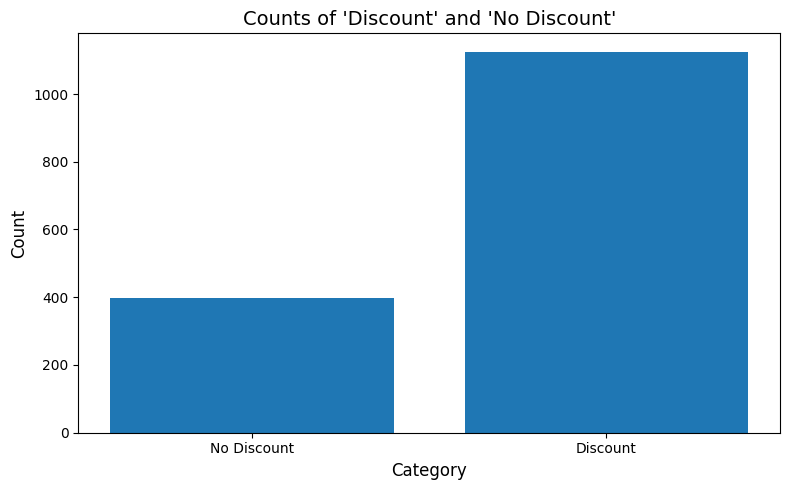

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.title("Counts of 'Discount' and 'No Discount'", fontsize=14)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Category", fontsize=12)

lst1 = ['No Discount', 'Discount']
lst2 = [no_discount_count, discount_count]

plt.bar(lst1, lst2)

plt.tight_layout()
plt.show()

In [ ]:
discount_counts__product = (df == "Discount").sum()
no_discount_counts_product = (df == "No Discount").sum()

counts_by_product = pd.DataFrame({
    "Discount": discount_counts__product,
    "No Discount": no_discount_counts_product
})

counts_by_product = counts_by_product.drop(index="id")

counts_by_product

,Discount,No Discount
piknic,127,25
milk,104,48
coffee,108,44
ramen,108,44
ice_cream,117,35
cereal,117,35
mustard,113,39
anchovy_noodle,109,43
soddeok,121,31
choco_cookie,99,53


<Figure size 1200x600 with 0 Axes>

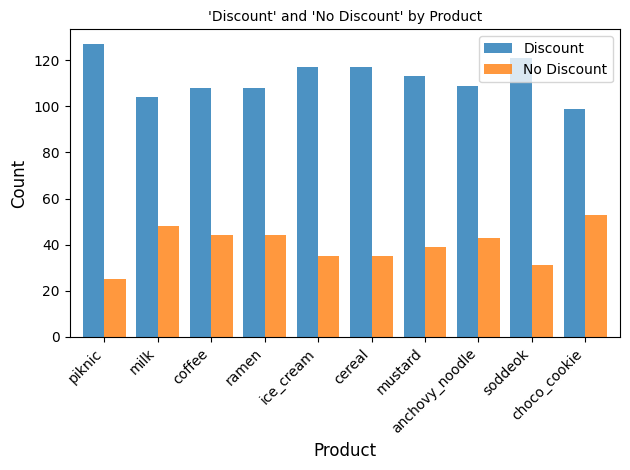

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
counts_by_product.plot(kind="bar", alpha=0.8, width=0.8)
plt.title("'Discount' and 'No Discount' by Product", fontsize=10)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Product", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest

df = counts_by_product

results = []

for product, row in df.iterrows():
    count = [row["Discount"], row["No Discount"]]
    sums = [sum(count), sum(count)]
    stat, p_value = proportions_ztest(count, sums)
    results.append((product, stat, p_value))

results_df = pd.DataFrame(results, columns=["Product", "Z-Statistic", "P-Value"])

print(results_df)

results_df.to_csv("proportion_test_results.csv", index=False)

results_df

          Product  Z-Statistic       P-Value
0          piknic    11.700202  1.271498e-31
1            milk     6.423641  1.330532e-10
2          coffee     7.341303  2.115236e-13
3           ramen     7.341303  2.115236e-13
4       ice_cream     9.406045  5.151567e-21
5          cereal     9.406045  5.151567e-21
6         mustard     8.488382  2.095336e-17
7  anchovy_noodle     7.570719  3.711635e-14
8         soddeok    10.323708  5.505497e-25
9    choco_cookie     5.276562  1.316301e-07


,Product,Z-Statistic,P-Value
0,piknic,11.700202,1.271498e-31
1,milk,6.423641,1.330532e-10
2,coffee,7.341303,2.115236e-13
3,ramen,7.341303,2.115236e-13
4,ice_cream,9.406045,5.151567e-21
5,cereal,9.406045,5.151567e-21
6,mustard,8.488382,2.095336e-17
7,anchovy_noodle,7.570719,3.711635e-14
8,soddeok,10.323708,5.505497e-25
9,choco_cookie,5.276562,1.316301e-07


In [ ]:
print(counts_by_product.head())
print(results_df.head())

           Discount  No Discount
piknic          127           25
milk            104           48
coffee          108           44
ramen           108           44
ice_cream       117           35
     Product  Z-Statistic       P-Value
0     piknic    11.700202  1.271498e-31
1       milk     6.423641  1.330532e-10
2     coffee     7.341303  2.115236e-13
3      ramen     7.341303  2.115236e-13
4  ice_cream     9.406045  5.151567e-21


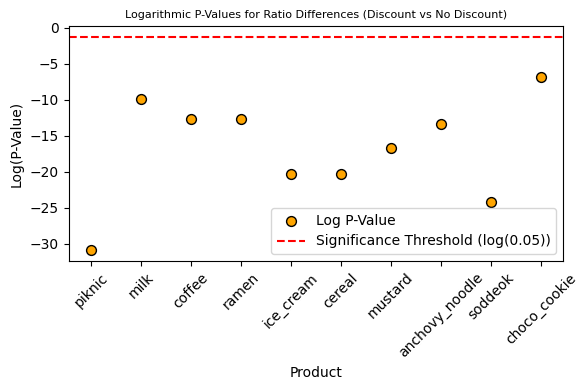

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

results_df['Log_P_Value'] = np.log10(results_df['P-Value'].replace(0, 1e-100))

plt.figure(figsize=(6, 4))

plt.scatter(results_df['Product'], results_df['Log_P_Value'], color='orange', edgecolor='black', s=50, label='Log P-Value')

plt.axhline(np.log10(0.05), color='red', linestyle='--', label="Significance Threshold (log(0.05))")

plt.xlabel("Product")
plt.ylabel("Log(P-Value)")
plt.title("Logarithmic P-Values for Ratio Differences (Discount vs No Discount)", fontsize = 8)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# User similarity

<ipython-input-11-184040c0b0b9>:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = df.iloc[:, 1:].applymap(lambda x: 1 if str(x).strip().lower() == 'discount' else 0)
<ipython-input-11-184040c0b0b9>:11: RuntimeWarning: invalid value encountered in scalar divide
  return prod / (len1 * len2)


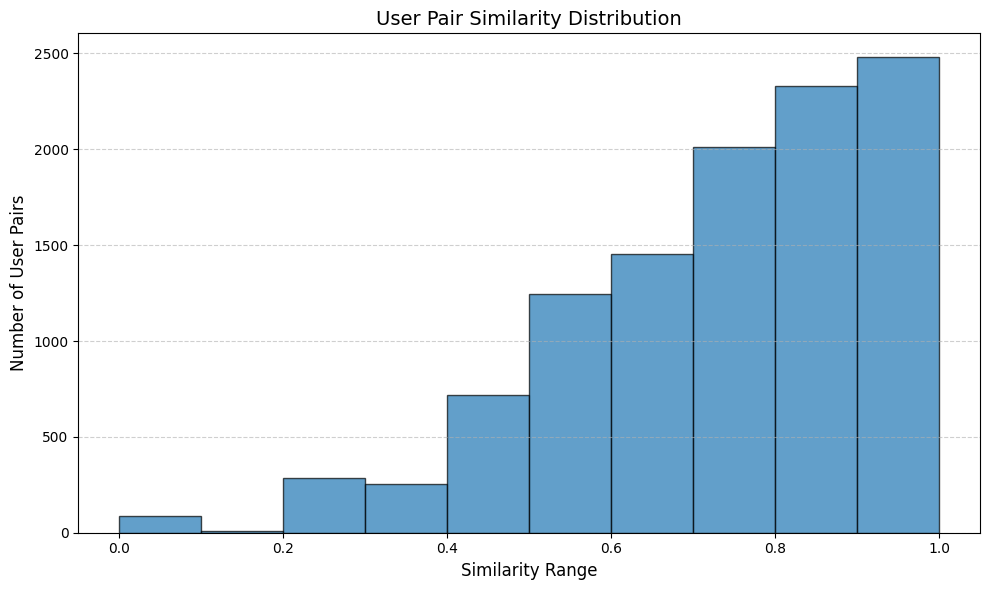

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('discount_survey.csv')

def cosine_similarity(v1, v2):
    prod = np.dot(v1, v2)
    len1 = np.sqrt(np.dot(v1, v1))
    len2 = np.sqrt(np.dot(v2, v2))
    return prod / (len1 * len2)

data = df.iloc[:, 1:].applymap(lambda x: 1 if str(x).strip().lower() == 'discount' else 0)

n_users = data.shape[0]
user_similarity = np.zeros((n_users, n_users))

for i in range(n_users):
    for j in range(n_users):
        user_similarity[i, j] = cosine_similarity(data.iloc[i], data.iloc[j])

similarity = user_similarity[np.triu_indices_from(user_similarity, k=1)]

plt.figure(figsize=(10, 6))
plt.hist(similarity, bins=np.arange(0, 1.1, 0.1), edgecolor='black', alpha=0.7)
plt.title("User Pair Similarity Distribution", fontsize=14)
plt.xlabel("Similarity Range", fontsize=12)
plt.ylabel("Number of User Pairs", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()

# Apriori & Association rule
detect frequent item sets & association rule

In [ ]:
!pip install adjustText

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from adjustText import adjust_text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-15-f1ea3abcdca5>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_processed = data.iloc[:, 1:].applymap(lambda x: 1 if str(x).strip().lower() == 'discount' else 0)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


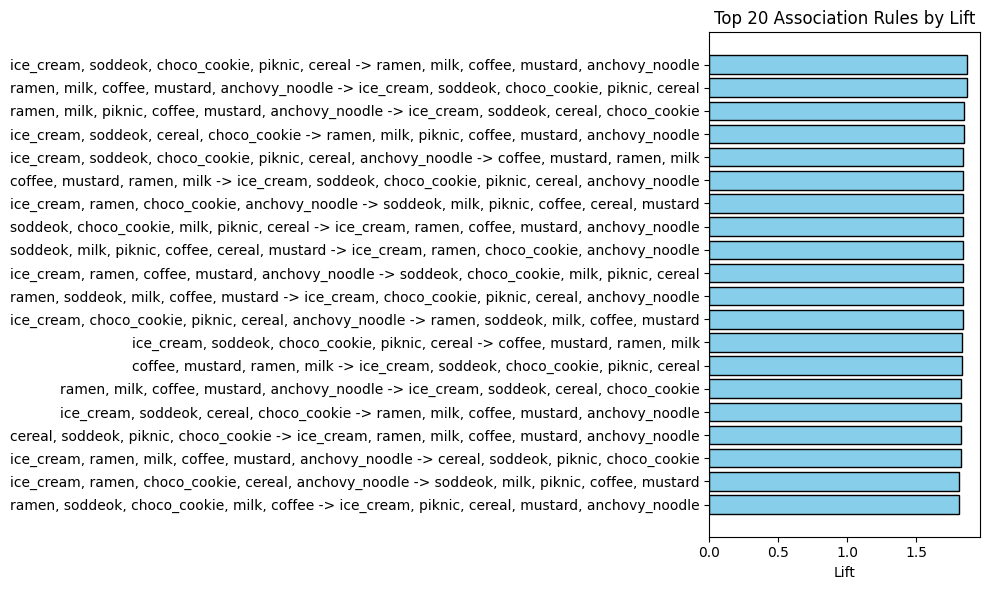

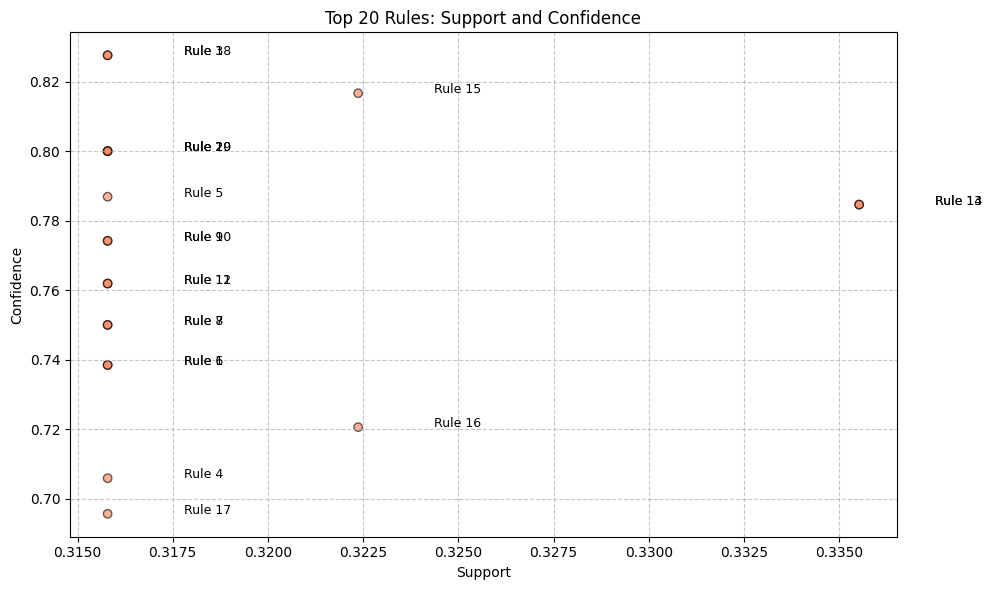

In [ ]:
data = pd.read_csv('discount_survey.csv')

data_processed = data.iloc[:, 1:].applymap(lambda x: 1 if str(x).strip().lower() == 'discount' else 0)

# Apriori
frequent_itemsets = apriori(data_processed, min_support=0.2, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0,
    num_itemsets=len(frequent_itemsets))

top_rules = rules.sort_values(by="lift", ascending=False).head(20)

plt.figure(figsize=(10, 6))
plt.barh(range(len(top_rules)), top_rules["lift"], color="skyblue", edgecolor="black")
plt.yticks(range(len(top_rules)), [
    f"{', '.join(list(rule))} -> {', '.join(list(cons))}"
    for rule, cons in zip(top_rules["antecedents"], top_rules["consequents"])
])
plt.xlabel("Lift")
plt.title("Top 20 Association Rules by Lift")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(top_rules["support"], top_rules["confidence"], s=top_rules["lift"] * 20, alpha=0.6, color="coral", edgecolor="black")
for i, (sup, con) in enumerate(zip(top_rules["support"], top_rules["confidence"])):
    plt.text(sup + 0.002, con, f"Rule {i+1}", fontsize=9)

plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Top 20 Rules: Support and Confidence")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
